In [9]:
import pandas as pd
import os
import geopandas as gpd
import geodatasets
import matplotlib.pyplot as plt
import geoplot as gplt
import geoplot.crs as gcrs
from shapely import LineString, Point
import numpy as np
import seaborn as sns
from copy import deepcopy

In [11]:
df = pd.read_json("final_dataset.json")
df.rename(columns={'PostalCode': 'zip'},inplace=True)
sales_df=df[df['TypeOfSale'] == 1]
sales_df=sales_df.dropna(subset=['SurfaceOfGood'])

In [12]:
zipcode_df = pd.read_json("zipcode-belgium.json")

In [13]:
zipcode_df.drop_duplicates(subset=['zip'],inplace=True)
point_geometry=[]
for lng,lat in zip(zipcode_df['lng'].to_numpy(),zipcode_df['lat'].to_numpy()):
    point_geometry.append(Point(lng,lat))
zipcode_df['geometry']=point_geometry
print(zipcode_df.head())

    zip        city       lng        lat                      geometry
0  1000   Bruxelles  4.351697  50.846557   POINT (4.351697 50.8465573)
1  1020      Laeken  4.348713  50.883392   POINT (4.3487134 50.883392)
2  1030  Schaerbeek  4.373712  50.867604  POINT (4.3737121 50.8676041)
3  1040   Etterbeek  4.389510  50.836851  POINT (4.3895104 50.8368511)
4  1050     Ixelles  4.381571  50.822285  POINT (4.3815707 50.8222854)


In [14]:
belgium = gpd.read_file("Belgium.provinces.WGS84.geojson")
#world = gpd.read_file("countries.geojson")
#belgium = world[world['ADMIN']=="Belgium"]
#print(belgium)

In [15]:
inner_merge=pd.merge(sales_df,zipcode_df,how="inner",on=["zip"])

In [16]:
visu_data=inner_merge[["zip",'lat','lng',"Price"]].groupby(["zip",'lat','lng']).count()

visu_data.rename(columns={'Price':'Count'},inplace=True)
visu_data=visu_data.merge(zipcode_df[['zip','lat','lng','geometry']], how='inner', on=['zip','lat','lng'])
visu_geodata=gpd.GeoDataFrame(visu_data[['zip','Count']],crs="EPSG:4326", geometry=visu_data['geometry'])

[]

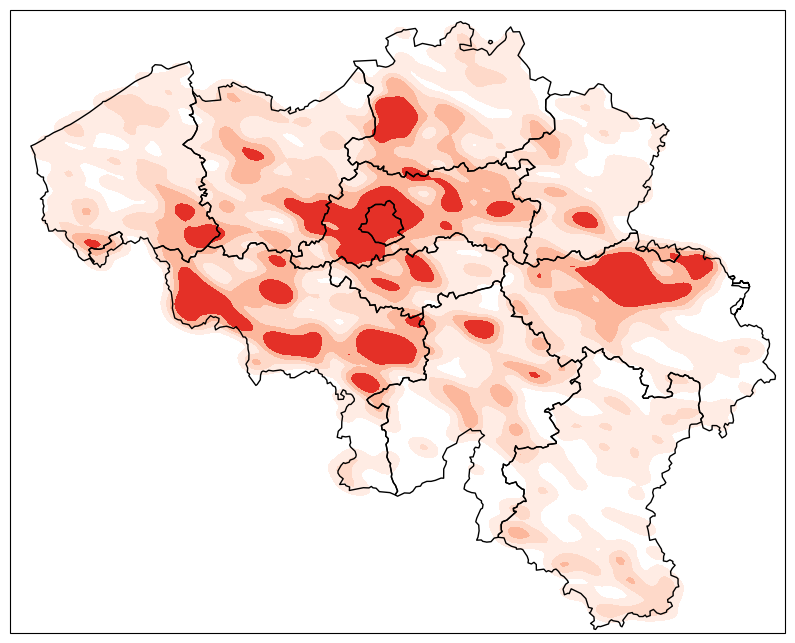

In [21]:
x = pd.Series([p.x for p in visu_geodata.geometry])
y = pd.Series([p.y for p in visu_geodata.geometry])

fig, ax = plt.subplots(1, 1, figsize=(10, 10), subplot_kw={'projection': gcrs.AlbersEqualArea()})

sns.kdeplot(x=x, y=y, bw_adjust=0.2 ,fill=True, cmap='Reds', ax=ax, zorder=0, levels=5)

belgium.plot(ax=ax, edgecolor='k', linewidth=1, zorder=2, color='none')

plt.plot()